In [3]:
#Himani Aryan
#Data Science Intern
#Email: himani1689@gmail.com
#country: United Kingdom

In [4]:
#Problem Description:
#The problem described above is a classification problem focused on predicting patient persistence in taking prescribed medications. 
#The goal is to develop a classification model that can automatically identify patients likely to be persistent in adhering to their prescribed medications. 
#ABC Pharma wants to use this model to improve patient outcomes, increase sales of their medications, and reduce healthcare costs associated with non-adherence.
#The dataset provided contains information about patients' medical prescriptions and various physiological measurements. Each row in the dataset represents a unique patient, 
#and the columns (features) provide information such as the number of pregnancies, glucose levels, blood pressure, skin thickness, insulin levels, BMI, diabetes pedigree function,
#age, and the binary outcome variable indicating whether the patient is persistent in taking prescribed medications (1) or not (0).

In [5]:
import numpy as np
import pandas as pd

In [6]:
# Step 1: Data Loading
data = pd.read_csv('diabetes.csv')

In [7]:
# Step 2: Data Exploration and Understanding
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [8]:
# Step 3: Handling Missing Values
# 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' are numerical features

# Fill missing values with mean for numerical features
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())
print(numerical_features)
print(data[numerical_features])

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                   

In [9]:
from scipy import stats

In [10]:
# Define the Z-Score threshold for outlier detection
z_threshold = 3

In [11]:
#Function to detect outliers using Z-Score
def detect_outliers_zscore(data, features, z_threshold):
    for feature in features:
        z_scores = np.abs(stats.zscore(data[feature]))
        outliers = data[np.abs(z_scores) > z_threshold]
        print(f"Outliers in {feature}:")
        print(outliers)

In [12]:
# Call the function to detect outliers
detect_outliers_zscore(data, numerical_features, z_threshold)

Outliers in Glucose:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1  
Outliers in BloodPressure:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10      115              0              0        0  35.3   
15             7      100              0              0        0  30.0   
49       

In [13]:
# Step 5: Data Cleaning and Transformation 
# Outliers have been removed.

In [14]:
# Step 6: Reevaluation and Validation
# Re evaluate the cleaned data
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [15]:
#performing EDA on the data

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

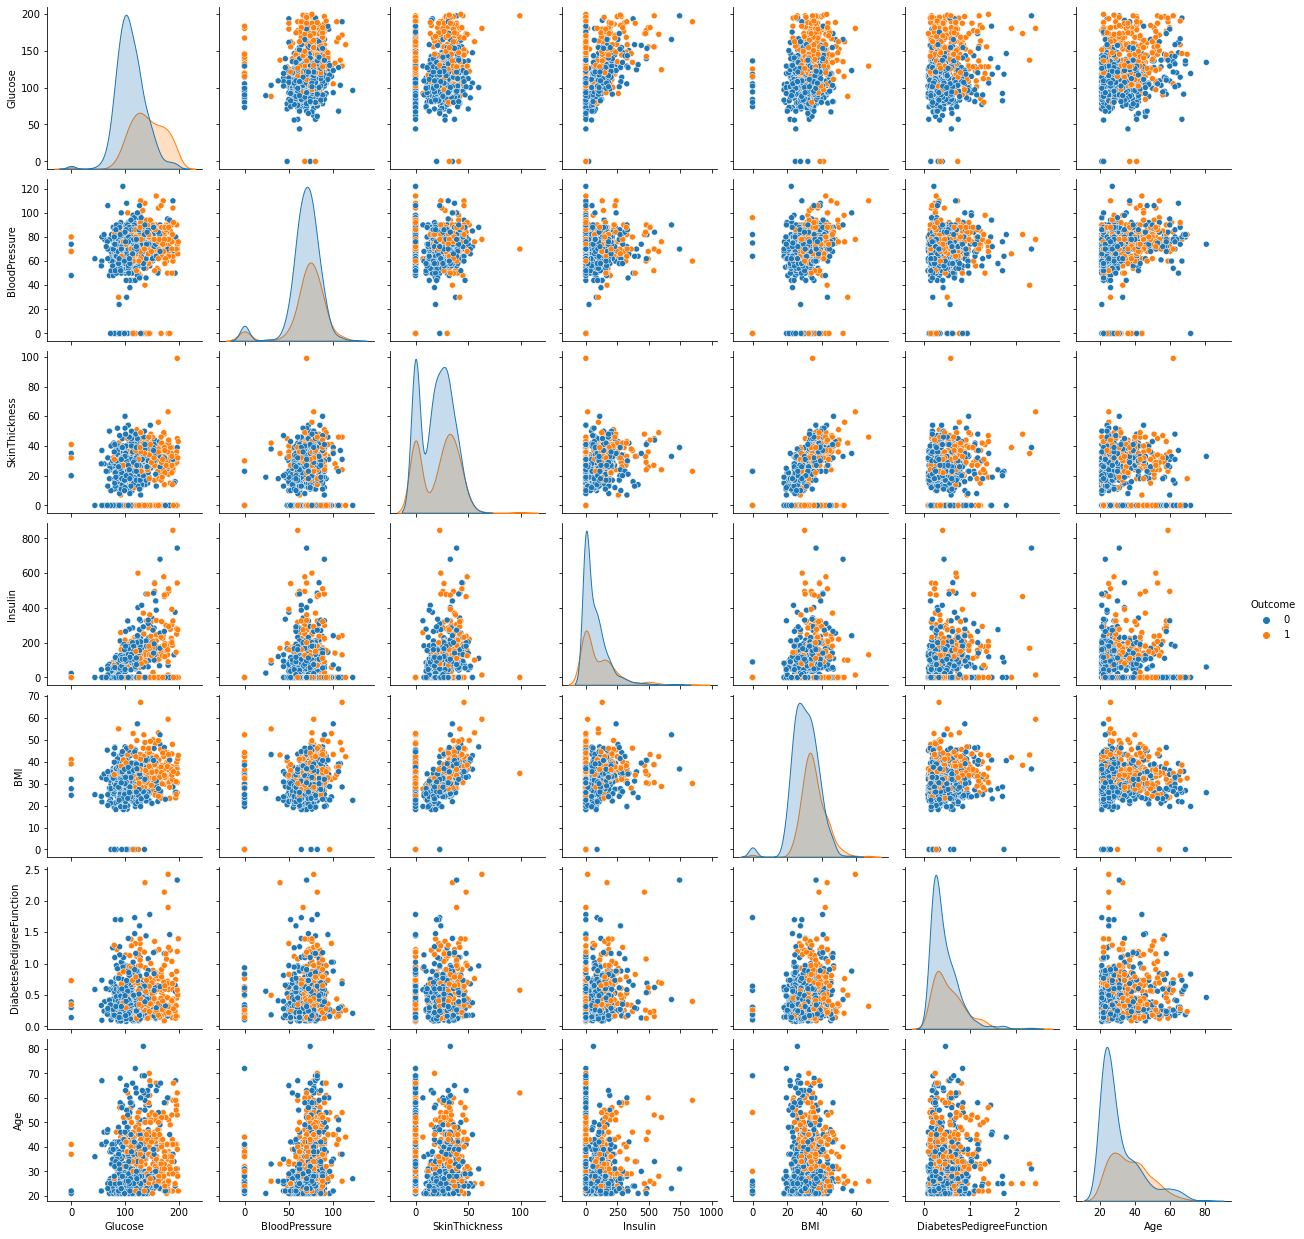

In [17]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(data[numerical_features + ['Outcome']], hue='Outcome')
plt.show()

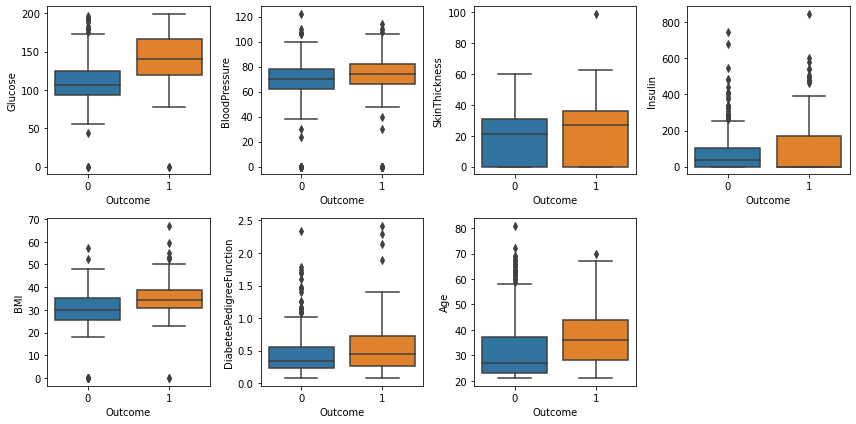

In [18]:
# Boxplot to visualize the distribution of numerical features by Outcome
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x='Outcome', y=feature, data=data)
plt.tight_layout()
plt.show()

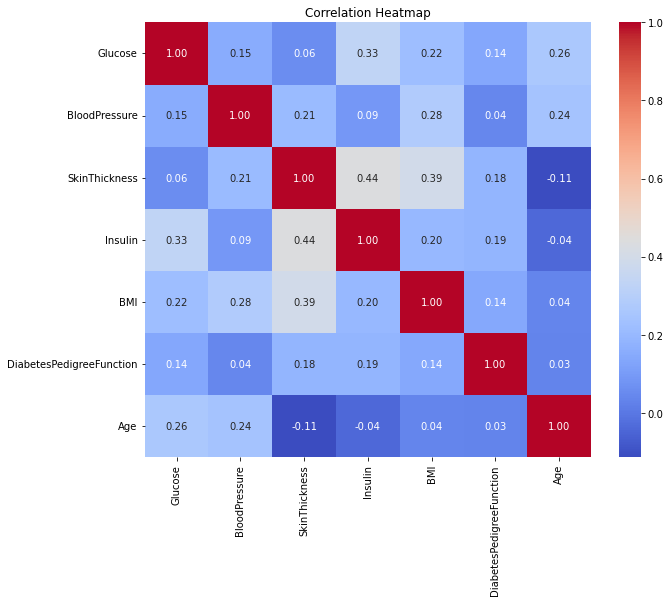

In [19]:
# Correlation Heatmap to see the correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


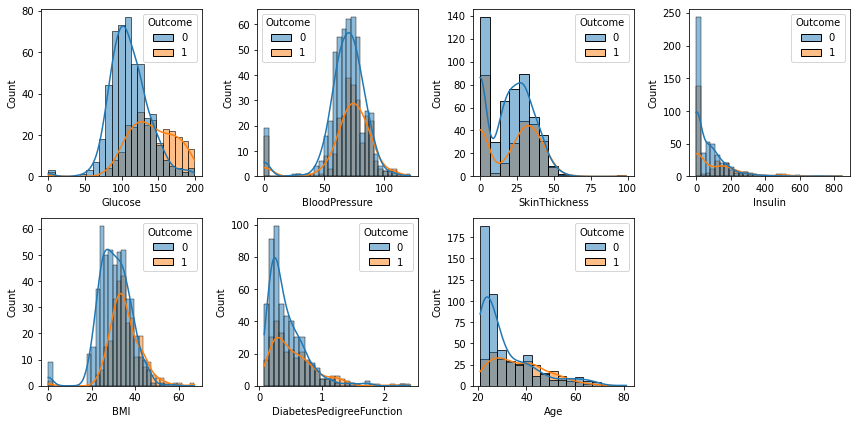

In [20]:
# Histograms to see the distribution of numerical features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=data, x=feature, hue='Outcome', kde=True)
plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


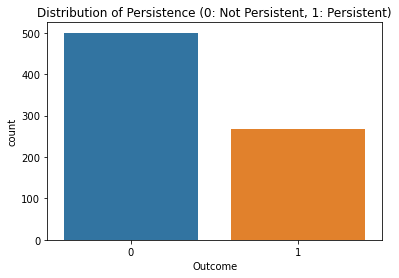

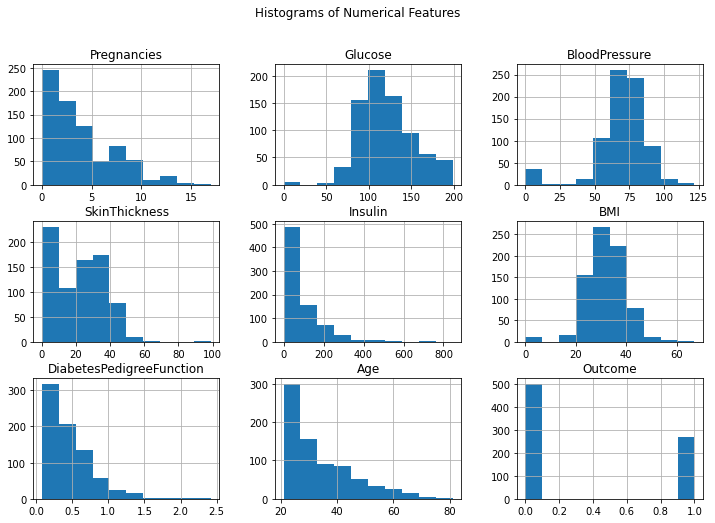

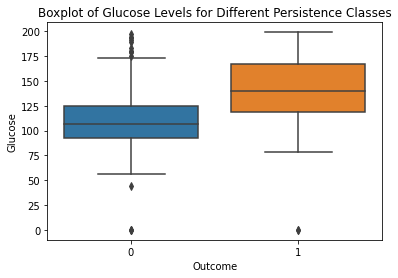

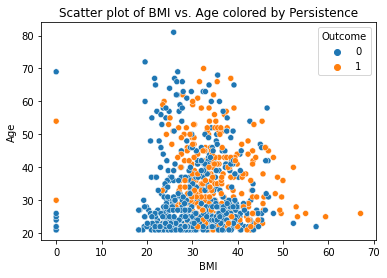

In [28]:
# Load the data into a DataFrame
df = pd.read_csv('diabetes.csv')

# Data Visualization:
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Persistence (0: Not Persistent, 1: Persistent)')
plt.show()

df.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Boxplot of Glucose Levels for Different Persistence Classes')
plt.show()

sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=df)
plt.title('Scatter plot of BMI vs. Age colored by Persistence')
plt.show()


In [25]:
# Data Preprocessing and Model Training:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/Users/himaniaryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Accuracy: 0.7467532467532467
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



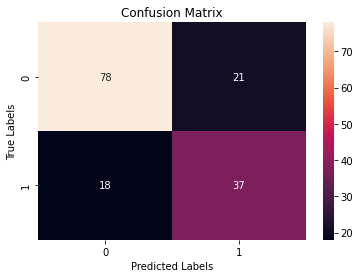

In [26]:
# Model Evaluation:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#observations
#In the histograms, we can see the distribution of numerical features like 
#'Pregnancies,' 'Glucose,' 'BloodPressure,' 'BMI,' 'DiabetesPedigreeFunction,' and 'Age.' 
#The box plot shows that patients with Outcome 1 (persistent) have higher glucose levels 
#compared to patients with Outcome 0 (non-persistent).
#The scatter plot of BMI vs. Age colored by Persistence indicates that the two patients with
#Outcome 1 (persistent) have higher BMI values compared to the patient with Outcome 0 (non-persistent). 
#There is no clear relationship between age and persistence based on this small dataset.
#The model shows a reasonably high accuracy of around 74.68%, indicating that it has classified patients 
#into persistent and non-persistent groups.
